Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder


call the dataset

In [17]:
test = pd.read_csv('test.csv', encoding='unicode_escape')
df = pd.read_csv('train.csv', encoding='unicode_escape')

df

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [3]:
df.dropna()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


define the variables for training testing

In [4]:
X = df['text']
y = df['sentiment']

In [5]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')

In [6]:
df.drop(columns=['Country', 'textID', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'], inplace=True)

Visualizing distribution

C:\Users\zeidh\AppData\Local\Temp\ipykernel_22900\2215362781.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


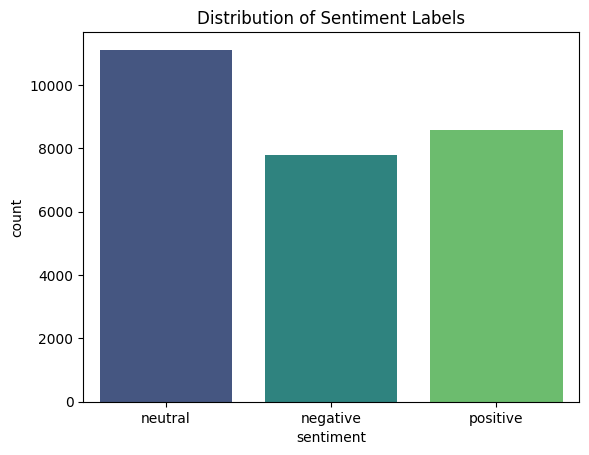

In [7]:
# Distribution of sentiment labels
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title("Distribution of Sentiment Labels")

plt.show()

In [18]:
df['text'].dtypes

dtype('O')

Convert the text into data to train

In [23]:
X = [str(text) for text in X]


In [24]:


tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
padded_sequences = pad_sequences(sequences, maxlen=200)


In [25]:
# Convert sentiment labels to binary
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Splitting the data into features (X) and labels (y)
X = padded_sequences
y = df['sentiment'].values

Split for training

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Custom model

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=200),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])


In [33]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
550/550 [==============================] - 50s 68ms/step - loss: 0.5454 - accuracy: 0.7454 - val_loss: 0.4322 - val_accuracy: 0.8278
Epoch 2/10
550/550 [==============================] - 33s 60ms/step - loss: 0.3498 - accuracy: 0.8587 - val_loss: 0.3846 - val_accuracy: 0.8469
Epoch 3/10
550/550 [==============================] - 33s 60ms/step - loss: 0.2692 - accuracy: 0.8974 - val_loss: 0.3872 - val_accuracy: 0.8403
Epoch 4/10
550/550 [==============================] - 43s 78ms/step - loss: 0.2268 - accuracy: 0.9166 - val_loss: 0.4108 - val_accuracy: 0.8458
Epoch 5/10
550/550 [==============================] - 42s 76ms/step - loss: 0.1960 - accuracy: 0.9305 - val_loss: 0.4520 - val_accuracy: 0.8258
Epoch 6/10
550/550 [==============================] - 34s 62ms/step - loss: 0.1760 - accuracy: 0.9402 - val_loss: 0.4724 - val_accuracy: 0.8367
Epoch 7/10
550/550 [==============================] - 45s 82ms/step - loss: 0.1545 - accuracy: 0.9502 - val_loss: 0.4869 - val_accuracy:

Accuracy

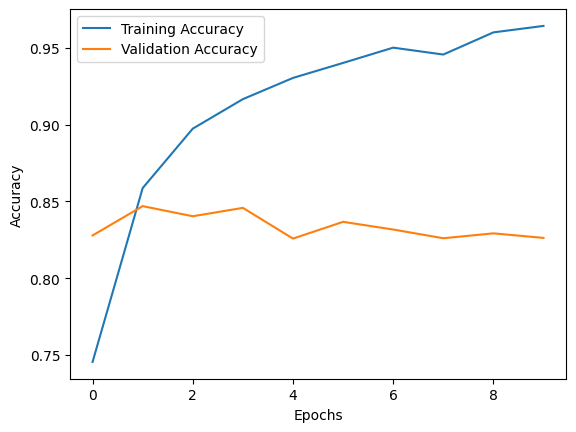

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

172/172 [==============================] - 5s 28ms/step - loss: 0.5846 - accuracy: 0.8215
Test Accuracy: 0.82


In [37]:
y_pred = model.predict(X_test)

172/172 [==============================] - 7s 34ms/step
